In [3]:
import torch 
from torch import nn 
import torch.optim as optim 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

X, y = make_regression(n_samples = 100, n_features = 1, noise = 10.0, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

X_train = torch.tensor(X_train, dtype = torch.float32) 
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1),dtype =  torch.float32) 
y_test_np = y_test.reshape(-1, 1) 
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32) 

In [5]:
model = nn.Linear(in_features=1, out_features=1)
optimizer = optim.SGD(model.parameters(), lr =0.1)
lambda_reg =0.1
epochs = 400

for epoch in range(epochs): 
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train) 
    mse_loss = nn.MSELoss()(outputs, y_train)
    
    l2_penalty =  sum(torch.sum(param ** 2) for param in model.parameters())
    loss = mse_loss + lambda_reg * l2_penalty

    loss.backward()
    optimizer.step()
    
    if (epoch+1) %100 ==0: 
        print("Epoch:", epoch+1, " Loss: ", loss.item())

model.eval()
with torch.no_grad(): 
    predictions = model(X_test).numpy()

mse = mean_squared_error(y_test_np, predictions) 
r2 = r2_score(y_test_np, predictions)

print("MSE:", mse)
print("R^2 Score: ", r2)

Epoch: 100  Loss:  221.30026245117188
Epoch: 200  Loss:  221.30026245117188
Epoch: 300  Loss:  221.30026245117188
Epoch: 400  Loss:  221.30026245117188
MSE: 119.19465128744636
R^2 Score:  0.9284105691682742


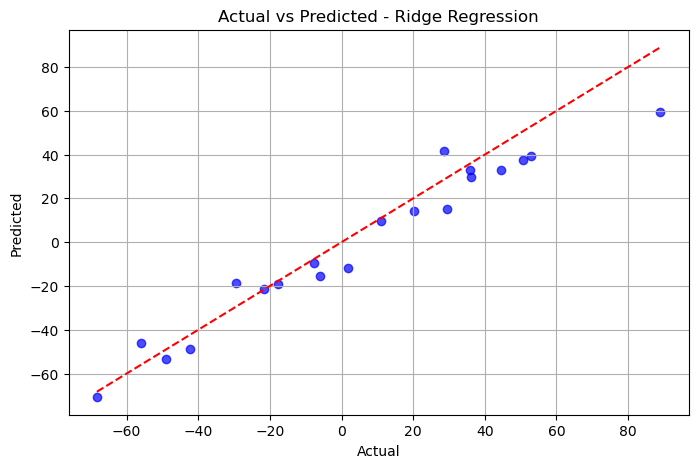

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_np, predictions, color='blue', alpha=0.7)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Ridge Regression")
plt.grid(True)
plt.show()

In [9]:
#Using the same source points for scikit-learn implementation 
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train, y_train) 

y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2 Score: ", r2)

MSE:  104.30608176907768
R^2 Score:  0.9373527815535724
